In [446]:
# loading the scrapper & analysis functions
from comment_crawler import *
from comment_crawler_analysis import *
import graphs_and_charts

In [447]:
%run comment_crawler.py
%run comment_crawler_analysis.py
%run graphs_and_charts.py
%run authors_names.py

#### Define the starting urls list:

In [188]:
starting_urls_list

['https://mymadison.io/documents/city-of-buffalo-open-data-policy',
 'https://mymadison.io/documents/durham-open-data-policy',
 'https://mymadison.io/documents/city-of-tyler-data-policy',
 'https://mymadison.io/documents/city-of-glendale-draft-open-data-resolution',
 'https://mymadison.io/documents/metro-nashville-government-open-data-policy',
 'https://mymadison.io/documents/city-of-syracuse-open-data-policy',
 'https://mymadison.io/documents/napervilleopendatapolicy',
 'https://mymadison.io/documents/bart-open-data-policy',
 'https://mymadison.io/documents/san-francisco-open-data-legislation-2014']

### Scrapping all the open data policy comments for all Madison websites and putting them into dataframes

In [192]:
all_madison_dfs, all_cities_dataframe = go_all_madison_websites(starting_urls_list)

/Users/summerfellow/anaconda/envs/py35/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/summerfellow/anaconda/envs/py35/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


In [193]:
all_cities_dataframe.head()

,comment_id,author,datetime,num_likes,quoted_text,comment_text,comment_text_aux,reply_ids,city_name
1,E4-XFnl1uKc,Aaron Lee,2017-01-25 04:32:19,2,None,I am in support of the proposed policy to furt...,<p>I am in support of the proposed policy to f...,[],Buffalo
2,E4-XFnjG3Ac,Aaron Lee,2017-01-25 04:25:20,0,public participation by providing regular oppo...,I would be interested to see this more finely ...,<p>I would be interested to see this more fine...,[],Buffalo
3,E4-XFnQhy2g,Aaron Krolikowski,2017-01-24 22:56:17,3,None,"I strongly support the proposed policy, with a...","<p>I strongly support the proposed policy, wit...",[],Buffalo
4,E4-XFnNQNY8,Aaron Krolikowski,2017-01-24 22:46:57,0,"Publish high quality, updated data with docume...",Can the portal include an option for community...,<p>Can the portal include an option for commun...,[],Buffalo
5,E4-XFnJHPCA,Aaron Krolikowski,2017-01-24 22:45:58,0,limitations on the disclosure of public inform...,It may be a helpful option to include a reposi...,<p>It may be a helpful option to include a rep...,[],Buffalo


In [194]:
for name, city in all_madison_dfs:
    print(name)

Buffalo
Durham
Tyler
Glendale
Nashville
Syracuse
Naperville
Bart
San Francisco


# Analysis

# 1) Most common words used

## a) most common words in quoted texts (policy sections)

### for all the cities combined


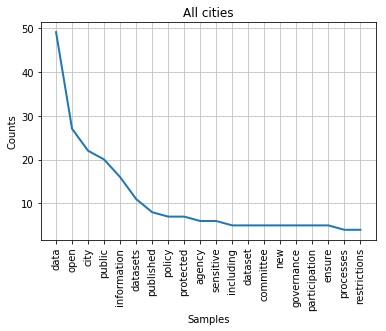

(             word  count
 0            data     49
 1            open     27
 2            city     22
 3          public     20
 4     information     16
 5        datasets     11
 6       published      8
 7          policy      7
 8       protected      7
 9          agency      6
 10      sensitive      6
 11      including      5
 12        dataset      5
 13      committee      5
 14            new      5
 15     governance      5
 16  participation      5
 17         ensure      5
 18      processes      4
 19   restrictions      4, None)

In [195]:
common_words_quoted_texts("quoted_text", "All cities", all_cities_dataframe, 20)

## b) most common words in actual comments

### for all the cities combined


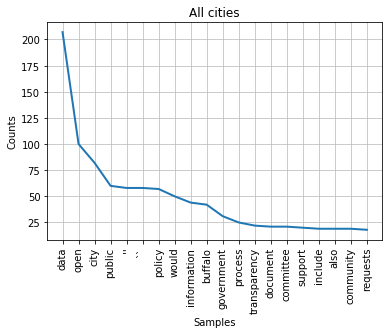

(            word  count
 0           data    207
 1           open    100
 2           city     82
 3         public     60
 4             ''     58
 5             ``     58
 6         policy     57
 7          would     50
 8    information     44
 9        buffalo     42
 10    government     31
 11       process     25
 12  transparency     22
 13      document     21
 14     committee     21
 15       support     20
 16       include     19
 17          also     19
 18     community     19
 19      requests     18, None)

In [196]:
common_words_quoted_texts("comment_text", "All cities", all_cities_dataframe, 20)

# 2) Sentiment Analysis

## a) sentiment analysis graphs for each city for comments of most commonly quoted policy sections

positive sentence: That would be super helpful :)
positive sentence: this is amazing. Very important.

total_comments: 11 --- city name: Buffalo


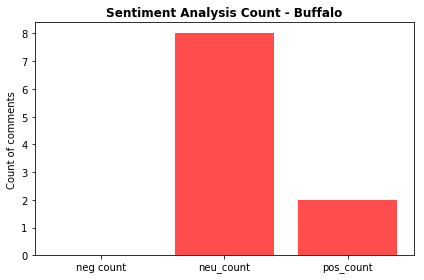

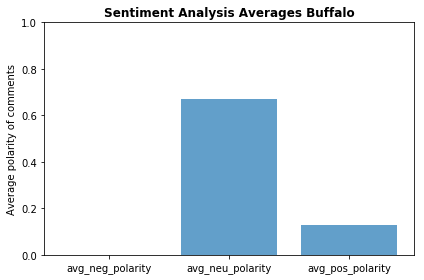

None

total_comments: 1 --- city name: Glendale


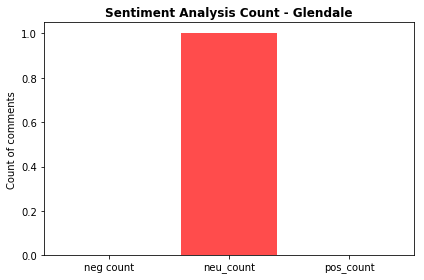

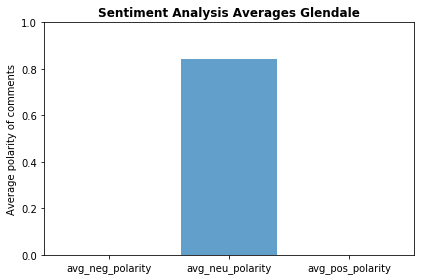

None
positive sentence: Awesome!
positive sentence: Cheers for this!

total_comments: 2 --- city name: Nashville


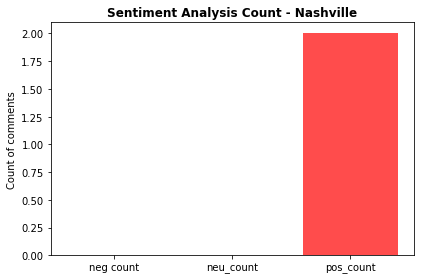

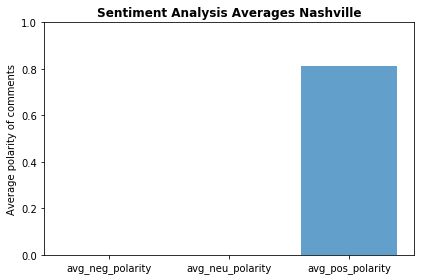

None
positive sentence: redundant - protect & sensitive are ultimately the same

total_comments: 10 --- city name: Syracuse


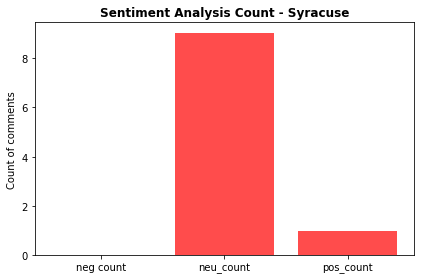

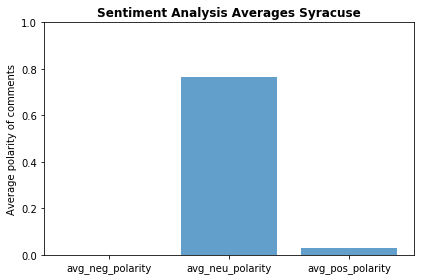

None

total_comments: 6 --- city name: Naperville


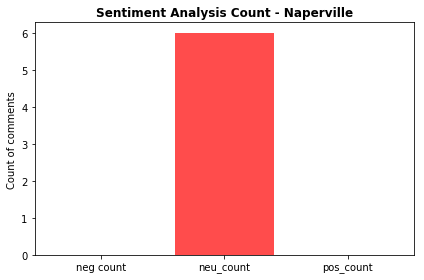

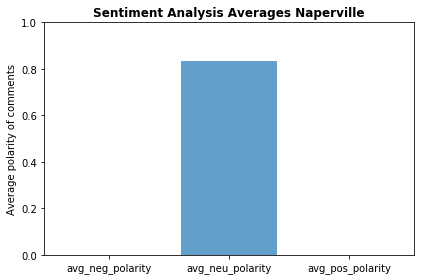

None

total_comments: 1 --- city name: San Francisco


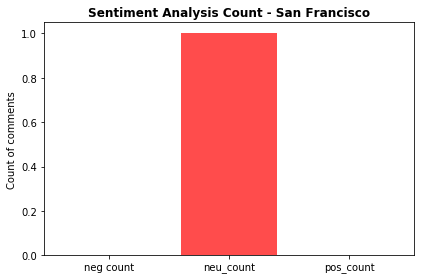

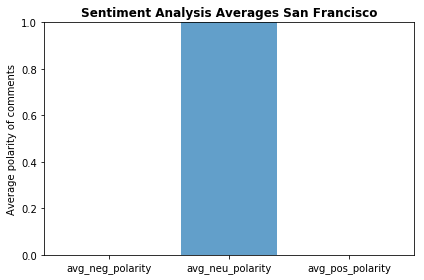

None


In [251]:
sentimental_analysis_graphs_1 = top_policy_sections_commented(all_madison_dfs, "most_common_policy", 3)

## b) sentiment analysis graphs for each city for all comments

positive sentence: equitable access to opportunity (open data can help move us closer to this goal)
positive sentence: Promote open data that informs increases in government efficiency, improvements in the quality of life of its citizens, and more equal opportunities for all residents.
negative sentence: risks to the public
positive sentence: this is amazing. Very important.
positive sentence: protected information
positive sentence: A central location is a good idea, IMHO
positive sentence: That would be super helpful :)

total_comments: 66 --- city name: Buffalo


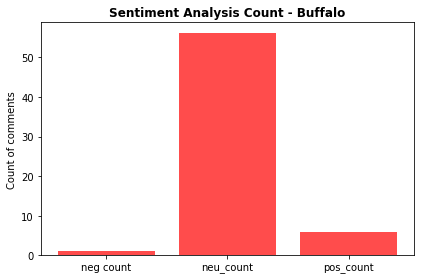

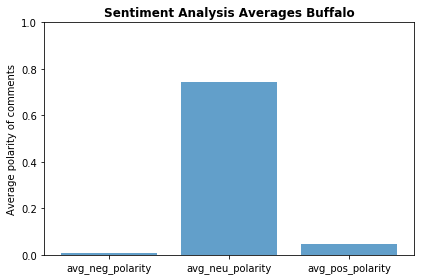

None

total_comments: 1 --- city name: Durham


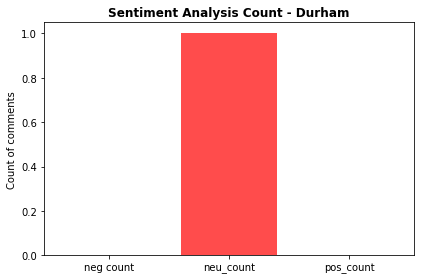

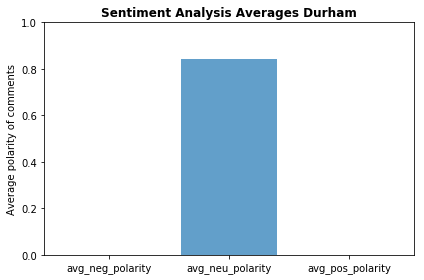

None

total_comments: 4 --- city name: Tyler


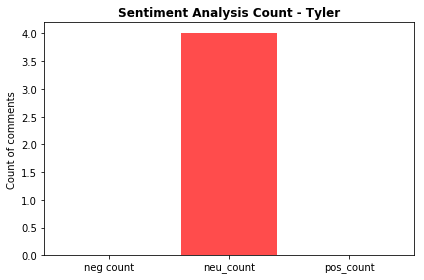

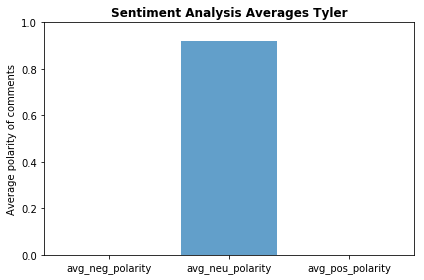

None
positive sentence: This resource would be of great value to the Human Resources Commission.  The demographic information would help serve as a guide to commission activities.  Kudos for the concept.

total_comments: 10 --- city name: Glendale


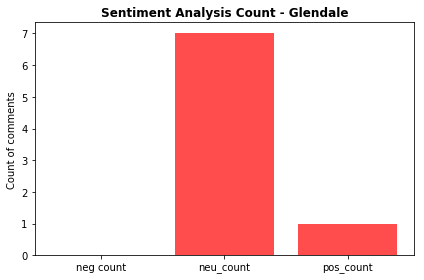

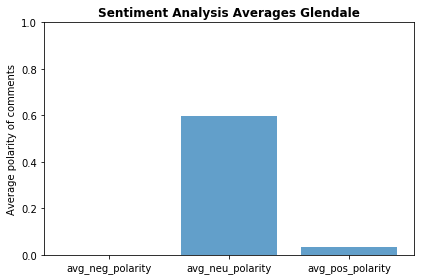

None
positive sentence: Awesome!
positive sentence: Cheers for this!

total_comments: 6 --- city name: Nashville


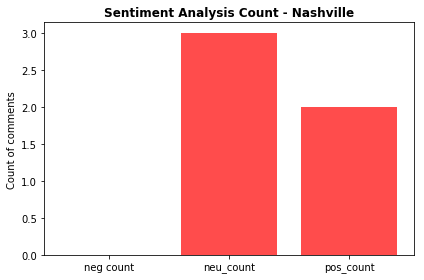

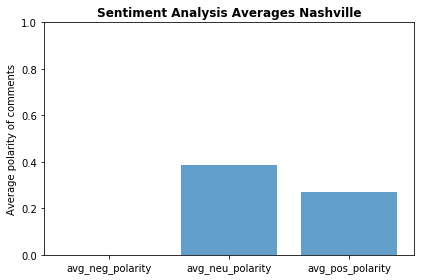

None
positive sentence: "Permanence" is a strong guarantee a priori, and could imply quadratically growing storage costs (e.g., if you save a bunch of snapshots). Also, publishing "with permanence" is a weird phrase. :)
positive sentence: redundant - protect & sensitive are ultimately the same
positive sentence: YES
positive sentence: This is terrific. A solid policy that will serve the city well and provide important guidance to city departments for releasing open data.
positive sentence: This would be a great opportunity for Syracuse to organize some community resources in a way that can increase civic engagement and generate transparency and accountability.

total_comments: 50 --- city name: Syracuse


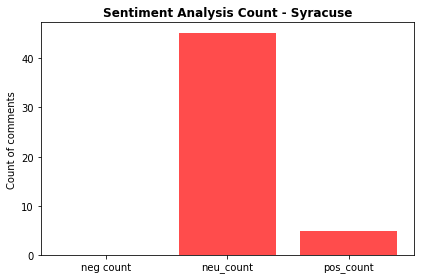

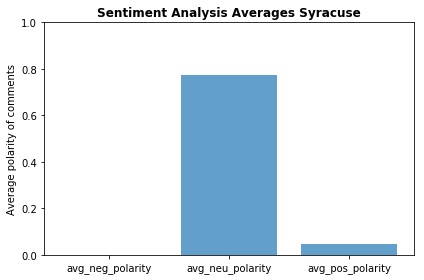

None
positive sentence: Datasets should also be analyzed and improved to be customer friendly.
positive sentence: Metadata helps users understand a dataset
positive sentence: Great idea. I would like to see how data is classified into private and public.

total_comments: 24 --- city name: Naperville


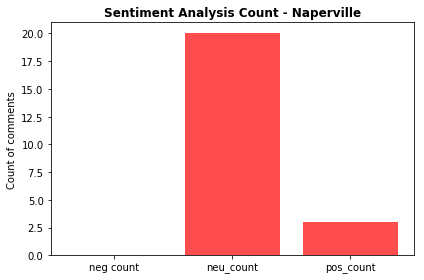

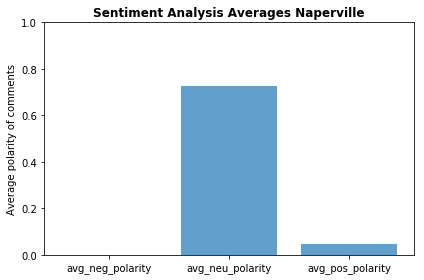

None

total_comments: 1 --- city name: Bart


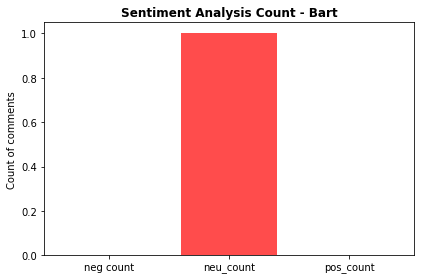

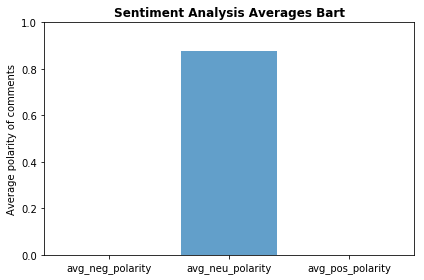

None
positive sentence: LOL

total_comments: 2 --- city name: San Francisco


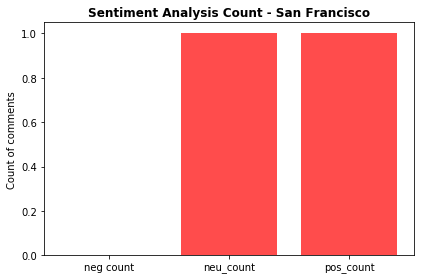

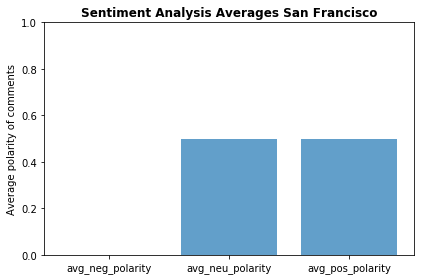

None


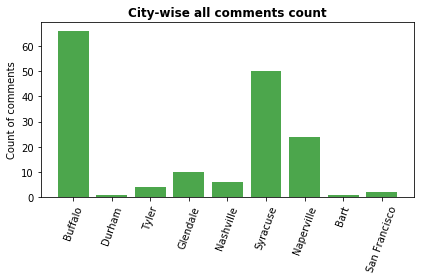

None


In [252]:
sentimental_analysis_graphs_2 = top_policy_sections_commented(all_madison_dfs, "all_common_comments", 3)

## c) sentiment analysis graphs for all the cities (aggregate) for most commonly quoted policy sections

positive sentence: Datasets should also be analyzed and improved to be customer friendly.

total_comments: 15 --- city name: All Cities


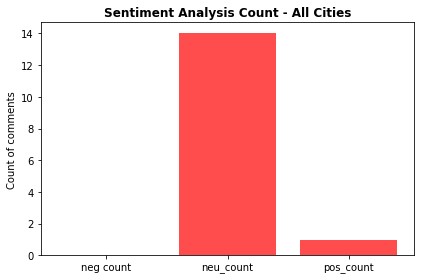

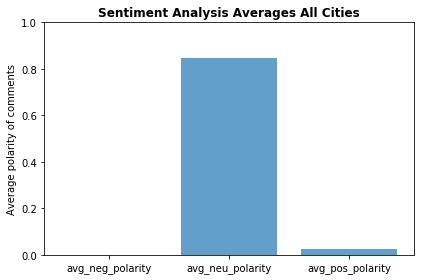

In [262]:
sentimental_analysis_graphs_3 = top_policy_sections_commented(all_cities_dataframe, "most_common_policy", 4)

## d) sentiment analysis for all the cities (aggregate) for all comments

positive sentence: equitable access to opportunity (open data can help move us closer to this goal)
positive sentence: Promote open data that informs increases in government efficiency, improvements in the quality of life of its citizens, and more equal opportunities for all residents.
negative sentence: risks to the public
positive sentence: this is amazing. Very important.
positive sentence: protected information
positive sentence: A central location is a good idea, IMHO
positive sentence: That would be super helpful :)
positive sentence: This resource would be of great value to the Human Resources Commission.  The demographic information would help serve as a guide to commission activities.  Kudos for the concept.
positive sentence: Awesome!
positive sentence: Cheers for this!
positive sentence: "Permanence" is a strong guarantee a priori, and could imply quadratically growing storage costs (e.g., if you save a bunch of snapshots). Also, publishing "with permanence" is a weird phras

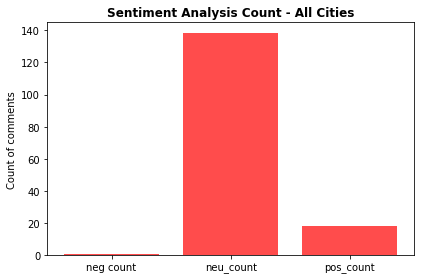

In [324]:
sentimental_analysis_graphs_4 = top_policy_sections_commented(all_cities_dataframe, "all_common_comments", 3)

# 3) Analyzing the most popular policy sections

In [288]:
popular_sections = sentimental_analysis_graphs_3[3]
filtered_pop_sections = pd.DataFrame()

for phrase, count in popular_sections:
    filtered_pop_sections = filtered_pop_sections.append(all_cities_dataframe[all_cities_dataframe['quoted_text'].astype(str).str.contains(phrase)])

filtered_pop_sections = filtered_pop_sections.reset_index()

In [289]:
popular_sections #popular sections phrases, number of times they are quoted

[('Open Data Governance Committee', 5),
 ('protected and sensitive information', 4),
 ('and sensitive information ;', 3),
 ('Develop and implement a', 3),
 ('and implement a process', 3),
 ('the city ’ s', 3),
 ('the Open Data Governance', 3),
 ('implement a process for', 3),
 ('deny access pursuant to', 2),
 ('with no restrictions on', 2)]

In [290]:
filtered_pop_sections = filtered_pop_sections.drop_duplicates("comment_text")

In [291]:
for index, row in filtered_pop_sections.iterrows():
    print('\033[1m' + "City:", row['city_name'])
    print('\033[0m' + "Partial quoted text:", row['quoted_text'])
    print('\033[1m' + "Comment text:", row['comment_text'])
    print()

City: Buffalo
Partial quoted text: Open Data Governance Committee
Comment text: Minutes from any and all meetings of this committee should be made available in machine-readable formats in an easily-accessible location (including within the open data system)

City: Buffalo
Partial quoted text: Open Data Governance Committee
Comment text: How will this committee be formed?  Will it be comprised of community stakeholders or only government employees/officials?

City: Buffalo
Partial quoted text: periodically update the data based on internal and external needs; serve on the Open Data Governance Committee; upon request, meet with the Open Data Governance Committee to discuss any matter pertaining to implementation of this Order; and assist in the preparation of the annual open data compliance report.
Comment text: Would this liaison be the contact person if a dataset user (ie a student doing a project or a researcher) had questions about the set?

City: Naperville
Partial quoted text: b. I

In [419]:
# hand-made (this needs eye-balling)
main_policies = ['Open Data Governance Committee', "Opportunities for Citizen Feedback", 'Privacy and Security', 'Useful, quality and timely data', "Prioritizing the release of open data", "Bulk Download"]
count_pop_policies = [3, 1, 5, 2, 2, 2]

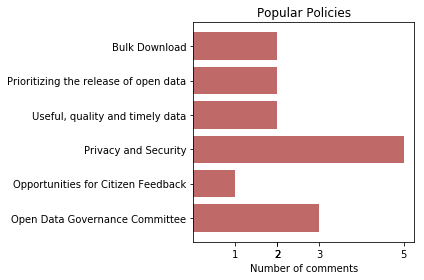

In [420]:
horizontal_bar(main_policies, count_pop_policies, "Number of comments", "Popular Policies")

# 4) Analyzing positive and negative sentiments

In [346]:
neg_count = sentimental_analysis_graphs_4[0][1]
neu_count = sentimental_analysis_graphs_4[0][3]
pos_count = sentimental_analysis_graphs_4[0][5]

/Users/summerfellow/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "upper corner". Falling back on "best"; valid locations are
	lower right
	center
	right
	center left
	lower left
	center right
	upper left
	lower center
	upper center
	upper right
	best

  six.iterkeys(self.codes))))


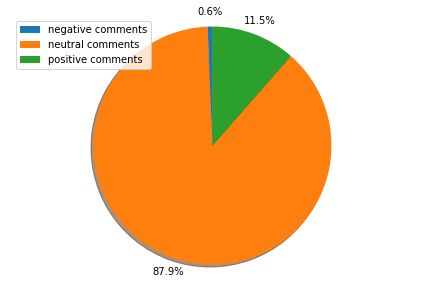

In [347]:
labels = ['negative comments', 'neutral comments', 'positive comments']
sizes = [neg_count, neu_count, pos_count]

pie_chart(sizes, labels, 'sentiment-analysis-pie-chart')

### a) Positive comments

In [351]:
pos_comments = sentimental_analysis_graphs_4[2]

In [352]:
pos_comments_dict = all_cities_dataframe[all_cities_dataframe['comment_text'].isin(pos_comments)].reset_index()

In [353]:
pos_comments_dict.head()

,index,comment_id,author,datetime,num_likes,quoted_text,comment_text,comment_text_aux,reply_ids,city_name
0,8,E4-XFm_mHqw,Aaron Krolikowski,2017-01-24 22:35:13,0,opportunity,equitable access to opportunity (open data can...,<p>equitable access to opportunity (open data ...,[],Buffalo
1,33,E4-XFiejO_4,Kelly Dodd,2017-01-24 03:04:56,2,Provide open data that increases government ef...,Promote open data that informs increases in go...,<p>Promote open data that informs increases in...,"[E4-XFiiGPbw, E4-XFjIXTLs, E4-XFkIuyUs]",Buffalo
2,49,E4-XFe4h4Dg,Andrew Nicklin,2017-01-17 02:56:54,1,including the records of third-party agency co...,this is amazing. Very important.,<p>this is amazing. Very important.</p>,"[E4-XFhzeuLI, E4-XFh74V00, E4-XFibN984, E4-XFm...",Buffalo
3,50,E4-XFesw1OU,Andrew Nicklin,2017-01-17 02:51:48,0,protected,protected information,<p>protected information</p>,[E4-XFexnyeI],Buffalo
4,55,E4-XFeauO2Q,Chris Slocum,2017-01-17 02:09:14,1,Maintain an open data portal that provides a c...,"A central location is a good idea, IMHO","<p>A central location is a good idea, IMHO</p>","[E4-XFe2EPUI, E4-XFgWX6pU, E4-XFgo3z-w, E4-XFi...",Buffalo


In [354]:
# hard-coded - needs eye-balling

pos_main_policies = ['Open Data Governance Committee', "Open Data Access", "Opportunities for Citizen Feedback", 'Privacy and Security', 'Useful, quality and timely data', "Prioritizing the release of open data", "Bulk Download"]
count_pos_policies = [1, 2, 1, 0, 5, 1, 0]

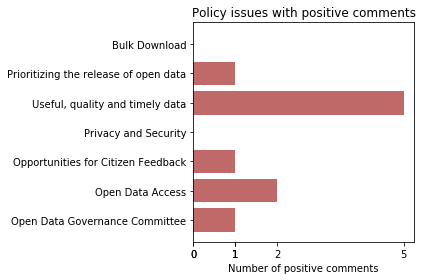

In [421]:
horizontal_bar(pos_main_policies, count_pos_policies, "Number of positive comments", "Policy issues with positive comments")

In [356]:
for index, row in pos_comments_dict.iterrows():
    print('\033[1m' + "City:", row['city_name'])
    print('\033[0m' + "Partial quoted text:", row['quoted_text'])
    print('\033[1m' + "Comment text:", row['comment_text'])
    print()

City: Buffalo
Partial quoted text: opportunity
Comment text: equitable access to opportunity (open data can help move us closer to this goal)

City: Buffalo
Partial quoted text: Provide open data that increases government efficiency, improves the quality of life of its citizens, and ensures opportunity for all residents.
Comment text: Promote open data that informs increases in government efficiency, improvements in the quality of life of its citizens, and more equal opportunities for all residents.

City: Buffalo
Partial quoted text: including the records of third-party agency contractors that create or acquire information, records, or data on behalf of a City division/department
Comment text: this is amazing. Very important.

City: Buffalo
Partial quoted text: protected
Comment text: protected information

City: Buffalo
Partial quoted text: Maintain an open data portal that provides a central location for published City data
Comment text: A central location is a good idea, IMHO

City

### b) Negative Comments

In [357]:
neg_comments = sentimental_analysis_graphs_4[1]

In [358]:
neg_comments_dict = all_cities_dataframe[all_cities_dataframe['comment_text'].isin(neg_comments)]

In [360]:
neg_comments_dict['full_quoted_text'] = full_quoted_text_neg
neg_comments_dict

/Users/summerfellow/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,comment_id,author,datetime,num_likes,quoted_text,comment_text,comment_text_aux,reply_ids,city_name,full_quoted_text
46,E4-XFfET0X4,Andrew Nicklin,2017-01-17 03:03:41,0,policy concerns,risks to the public,<p>risks to the public</p>,[E4-XFfIhTHE],Buffalo,Ensure that access to restricted data is block...


In [361]:
for index, row in neg_comments_dict.iterrows():
    print('\033[1m' + "City:", row['city_name'])
    print('\033[0m' + "Full quoted text:", row['full_quoted_text'])
    print('\033[1m' + "Comment text:", row['comment_text'])
    print()

City: Buffalo
Full quoted text: Ensure that access to restricted data is blocked, but make it possible to extract non-protected information from restricted sources and remove any data that represents policy concerns for publication, where feasible;
Comment text: risks to the public



# 5) likes and replies analysis (popular comments extended)

### a) analysis of comments *with more than 2 likes*

In [395]:
high_likes_comments = likes_replies_analysis("3", 'num_likes', all_cities_dataframe)


comment:

I strongly support the proposed policy, with a recognition of the outstanding contributions that have already been made by other residents, citizens, and interested parties.Many thanks to the City of Buffalo for leading this effort. Most of my comments are within the document itself, but I do agree with other comments below that emphasize the need for substantial citizen involvement in governance, application, and oversight. During the RFP process, I would encourage the city to include not only requirements for a portal, but also an iterative feedback/improvement process with residents and regular data users so that the city's investment in this system can produce tangible use cases and real benefits to our city and its people.The Department of Citizen Services should also be commended for their use of the collaborative policymaking platform. In the age of the internet, this is an excellent way to increase public participation in these types of processes. Many thanks for thi

In [370]:
high_likes_comments.head()

,index,comment_id,author,datetime,num_likes,quoted_text,comment_text,comment_text_aux,reply_ids,city_name
0,3,E4-XFnQhy2g,Aaron Krolikowski,2017-01-24 22:56:17,3,None,"I strongly support the proposed policy, with a...","<p>I strongly support the proposed policy, wit...",[],Buffalo
1,21,E4-XFj2bu7o,Karyn Tareen,2017-01-24 14:55:16,4,None,Thank you to the City of Buffalo! My comments...,<p>Thank you to the City of Buffalo! My comme...,[],Buffalo
2,24,E4-XFjdEn7k,Sean Myers,2017-01-24 11:27:42,7,None,Thank you City of Buffalo for taking on this i...,<p>Thank you City of Buffalo for taking on thi...,[],Buffalo
3,35,E4-XFhv7L1k,Brian Borncamp,2017-01-23 03:48:27,3,None,My comments are rather lengthy. In addition to...,<p>My comments are rather lengthy. In addition...,[],Buffalo
4,39,E4-XFg5jX48,Joseph Ghosen,2017-01-19 13:14:53,4,metadata,Metadata is the key to making sure that the da...,<p>Metadata is the key to making sure that the...,"[E4-XFhkrg2M, E4-XFh56vbw]",Buffalo


In [374]:
high_likes_comments_count_city = high_likes_comments.groupby(['city_name']).size().reset_index().rename(columns={0:'count'})

In [375]:
high_likes_comments_count_city

,city_name,count
0,Buffalo,6
1,Naperville,1
2,Syracuse,2


In [377]:
likes_x = high_likes_comments_count_city['city_name'].tolist()
likes_y = high_likes_comments_count_city['count'].tolist()

### b) analysis of comments with *more than 2 replies*

In [378]:
#all_cities_dataframe['reply_ids'].size
all_cities_dataframe['reply_ids_count'] = all_cities_dataframe['reply_ids'].str.len()

In [396]:
high_replies = likes_replies_analysis(3, 'reply_ids_count', all_cities_dataframe)


comment:

Other options being explored? Bulk dataset download is still very common and effective, especially for those users who may not be comfortable accessing an API.

comment:

Promote open data that informs increases in government efficiency, improvements in the quality of life of its citizens, and more equal opportunities for all residents.

comment:

Will data be shared if it is not regularly maintained?  Perhaps "date of update" could be identified in the metadata.  Will adopting an OpenData policy encourage the city to more regularly maintain datasets or will this clause be used to skirt sharing policies?  Historical data (not regularly maintained) is still data.

comment:

I am 100% supportive of open data and anything that improves citizen participation, however I opposed this document as it seems the Mayor implementing his own Open Data is a waste of funds and a duplication of efforts since this already exists for the City of Buffalo with the Comptroller's Open Book.  If t

In [381]:
high_replies.head()

,index,comment_id,author,datetime,num_likes,quoted_text,comment_text,comment_text_aux,reply_ids,city_name,reply_ids_count
0,30,E4-XFix9HHY,Peter Johnson,2017-01-24 04:01:27,2,Application Programming Interfaces (API,Other options being explored? Bulk dataset dow...,<p>Other options being explored? Bulk dataset ...,"[E4-XFj-asew, E4-XFkAnfVE, E4-XFl22vv8, E4-XFn...",Buffalo,4
1,33,E4-XFiejO_4,Kelly Dodd,2017-01-24 03:04:56,2,Provide open data that increases government ef...,Promote open data that informs increases in go...,<p>Promote open data that informs increases in...,"[E4-XFiiGPbw, E4-XFjIXTLs, E4-XFkIuyUs]",Buffalo,3
2,34,E4-XFiRBEvg,Monica Stephens,2017-01-24 01:35:33,2,regularly maintained,Will data be shared if it is not regularly mai...,<p>Will data be shared if it is not regularly ...,"[E4-XFiXvZqU, E4-XFiotKgk, E4-XFmBOIfc]",Buffalo,3
3,41,E4-XFghnJBc,Aubrey Hlavaty,2017-01-17 14:15:17,0,None,I am 100% supportive of open data and anything...,<p>I am 100% supportive of open data and anyth...,"[E4-XFgi7irs, E4-XFgm8f0U, E4-XFgo3uV8]",Buffalo,3
4,48,E4-XFe7hjYs,Andrew Nicklin,2017-01-17 02:59:19,1,is,is or will be,<p>is or will be</p>,"[E4-XFe_YcM8, E4-XFgFMLWA, E4-XFgfoN6c, E4-XFj...",Buffalo,5


In [382]:
high_replies_comments_count_city = high_replies.groupby(['city_name']).size().reset_index().rename(columns={0:'count'})

In [383]:
high_replies_comments_count_city

,city_name,count
0,Buffalo,8
1,Syracuse,5


In [397]:
replies_x = high_replies_comments_count_city['city_name'].tolist()
replies_y = high_replies_comments_count_city['count'].tolist()

#### stacked chart

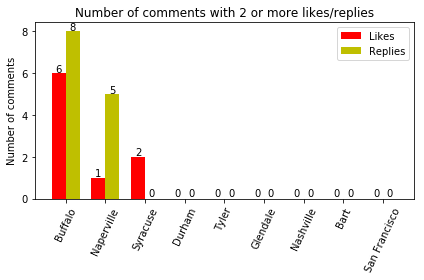

In [425]:
likes_replies_chart('Number of comments', 'Number of comments with 2 or more likes/replies', likes_x, likes_y, replies_x, replies_y, all_madison_dfs)

# 6) Authors' analysis

##### the following data was found by searching the names of authors' on the internet

In [429]:
full_authors_list = []
positions = []
company_names = []
category = []
authors = []

for name in all_cities_dataframe['author']:
    for name_2 in authors_names:
        if name == name_2[0]:
            authors.append(name_2[0])
            positions.append(name_2[1])
            company_names.append(name_2[2])
            category.append(name_2[3])

In [430]:
for i in all_cities_dataframe['author'].tolist():
    if i not in authors:
        print(i)
#print(len(authors))

In [431]:
all_cities_dataframe['Position'] = positions
all_cities_dataframe['Company_name'] = company_names
all_cities_dataframe['Category_work'] = category

In [433]:
all_cities_dataframe.head()

,comment_id,author,datetime,num_likes,quoted_text,comment_text,comment_text_aux,reply_ids,city_name,reply_ids_count,Position,Company_name,Category_work
1,E4-XFnl1uKc,Aaron Lee,2017-01-25 04:32:19,2,None,I am in support of the proposed policy to furt...,<p>I am in support of the proposed policy to f...,[],Buffalo,0,Software Developer,Solace Systems,Private
2,E4-XFnjG3Ac,Aaron Lee,2017-01-25 04:25:20,0,public participation by providing regular oppo...,I would be interested to see this more finely ...,<p>I would be interested to see this more fine...,[],Buffalo,0,Software Developer,Solace Systems,Private
3,E4-XFnQhy2g,Aaron Krolikowski,2017-01-24 22:56:17,3,None,"I strongly support the proposed policy, with a...","<p>I strongly support the proposed policy, wit...",[],Buffalo,0,Researcher,Freelance,Academia (private)
4,E4-XFnNQNY8,Aaron Krolikowski,2017-01-24 22:46:57,0,"Publish high quality, updated data with docume...",Can the portal include an option for community...,<p>Can the portal include an option for commun...,[],Buffalo,0,Researcher,Freelance,Academia (private)
5,E4-XFnJHPCA,Aaron Krolikowski,2017-01-24 22:45:58,0,limitations on the disclosure of public inform...,It may be a helpful option to include a reposi...,<p>It may be a helpful option to include a rep...,[],Buffalo,0,Researcher,Freelance,Academia (private)


In [434]:
all_cities_dataframe = all_cities_dataframe[['comment_id', 'author', 'Position', 'Company_name', 'Category_work', 'datetime', 'num_likes', 'quoted_text', 'comment_text', 'comment_text_aux', 'reply_ids', 'city_name']]

##### count just positions

In [435]:
count_positions = all_cities_dataframe.drop_duplicates('author').reset_index()
count_just_positions = count_positions.groupby(['Position']).size().reset_index().rename(columns={0:'count'})
count_just_positions = count_just_positions.sort_values("count", ascending=False).reset_index()

 ##### count just categories

In [449]:
count_just_categories = count_positions.groupby(['Category_work']).size().reset_index().rename(columns={0:'count'})
count_just_categories = count_just_categories.sort_values("count", ascending=False).reset_index()

In [450]:
count_just_categories

,index,Category_work,count
0,10,Unknown,28
1,7,Private,12
2,0,Academia (private),7
3,1,City Government,7
4,6,Not-for-profit,3
5,9,Public,2
6,2,Federal Government,1
7,3,Foreign Government,1
8,4,Government,1
9,5,Non-Profit,1


In [441]:
all_categories_work = count_just_categories["Category_work"]
#count_positions = count_just_positions["count"]
#import seaborn as sns

ax = count_just_categories[['Category_work','count']].plot(kind="barh")

fig_4 = ax.get_figure()
ax.set_xlabel('Number of people')
#ax.set_title('Who comments the most?')
ax.set_yticklabels(all_categories_work)
fig_4.tight_layout()
ax.legend_.remove()
fig_4.show()
fig_4.savefig('who-comments-the-most-3.png', dpi=200)

/Users/summerfellow/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [451]:
count_just_positions = count_just_positions.head(10)

In [44]:
positions_positions = count_just_positions["Position"]
#count_positions = count_just_positions["count"]
#import seaborn as sns

ax = count_just_positions[['Position','count']].plot(kind="barh")

fig_3 = ax.get_figure()
ax.set_xlabel('Number of people')
ax.set_title('Who comments the most?')
ax.set_yticklabels(positions_positions)
ax.legend_.remove()
fig_3.tight_layout()
fig_3.show()
fig_3.savefig('who-comments-the-most-2.png', dpi=200)

/Users/summerfellow/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [45]:
count_positions = count_positions.groupby(['Position', 'city_name']).size().reset_index().rename(columns={0:'count'})

In [46]:
count_positions = count_positions.sort_values(['city_name', 'count'], ascending=False).reset_index()

In [47]:
count_positions = count_positions.groupby('city_name').head(2)

In [48]:
count_positions

,index,Position,city_name,count
0,37,Unknown,Tyler,3
1,36,Unknown,Syracuse,5
2,25,Software Developer,Syracuse,2
11,10,Director for Open Participation and Communities,San Francisco,1
12,35,Unknown,San Francisco,1
13,24,Software Developer,Nashville,1
14,28,Statistician,Nashville,1
16,5,Civic Technologist,Naperville,3
17,3,Chief Data Officer,Naperville,1
21,32,Unknown,Glendale,7


#### city and position analysis

In [49]:
position_list = count_positions['Position'].tolist()
city_list = count_positions['city_name'].unique().tolist()

In [50]:
import matplotlib
matplotlib.style.use('ggplot')

In [51]:
ax = count_positions.pivot("city_name", "Position", "count").plot.barh(stacked=True)
fig_2 = ax.get_figure()
ax.set_xlabel('Number of people')
ax.set_ylabel('')
ax.set_title('Who comments the most?')
lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig_2.tight_layout()
fig_2.show()
fig_2.savefig('who-comments-the-most.png', dpi=200, bbox_extra_artists=(lgd,), bbox_inches='tight')

/Users/summerfellow/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
